In [5]:
# Import Libraries
import pandas as pd
import re
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# Load the dataset
# Here, we are considering a data set of the 1.6 million tweets made by the users on TV series named 'SuperNatural'
# It has the columns like target variable, Ids of the users who tweeted, When they did the tweet, User and Tweet messages
# First we are taking this excel data set into a data frame
# header=None : This means that the data set doesn't have a header row

df = pd.read_csv('twitter.csv', encoding='ISO-8859-1', header=None)

In [7]:
# Since our data set doesn't have headers, we assign them to the dataframe
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [8]:
# Verify the encoding
print("Value counts in the target column after re-encoding:")
print(df['target'].value_counts())

Value counts in the target column after re-encoding:
0    800000
4    800000
Name: target, dtype: int64


In [9]:
# Here, we are substituting or mapping the values of 0 and 4 from 'target' column with 0 and 1
# To better classify the labels in target column such as '0' means negative tweet and '1' means positive tweet

df['target'] = df['target'].map({0: 0, 4: 1})

In [10]:
# Display the first five rows of the dataset
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
# Display the last five rows of the dataset
df.tail()

,target,ids,date,flag,user,text
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
# Display the column headers in the data frame
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [14]:
# Get the size of the data set
df.shape

(1600000, 6)

In [15]:
# Get information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
import numpy as np

In [17]:
# Checking Null Values
np.sum(df.isnull().any(axis=1))

0

In [18]:
# Selecting the text and label coloumn
data=df[['text','target']]

In [19]:
# Assigning 1 to Positive sentiment named 4 in the target column
data['target'][data['target']==4]=1

<ipython-input-19-d07ed9973bfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][data['target']==4]=1


In [20]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [21]:
# Taking first 20000 rows, so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [22]:
# Combining positive and negative data
data = pd.concat([data_pos, data_neg])

In [23]:
# Data Cleaning and Preprocessing
# As we are working on a text data here, we are performing the cleaning process to remove unnecesary details
# Here, we are doing this process on the column 'Tweet'. Since it has unnecessary data like URLs, mentions, hashtags and punctuations
# Defining a function named clean_Tweets to perform the cleaning process
# re.sub(): removes that particular text from the tweet

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet, re.I|re.A)  # Remove punctuation
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

In [24]:
# Apply the cleaning function to the dataset
df['cleaned_text'] = df['text'].apply(clean_tweet)

In [25]:
# Download NLTK resources and perform stemming
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
# Stemming
stemmer = SnowballStemmer('english')
df['stemmed_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(token) for token in word_tokenize(x)]))

In [27]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))
features = tfidf_vectorizer.fit_transform(df['stemmed_text'])

In [28]:
# Splitting the dataset into training = 70% and testing = 30% sets respectively
X_train, X_test, y_train, y_test = train_test_split(features, df['target'], test_size=0.3, random_state=42)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [31]:
# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
best_lr_model = grid_lr.fit(X_train, y_train).best_estimator_

In [32]:
# Hyperparameter Tuning for LinearSVC
param_grid_svc = {'C': [0.01, 0.1, 1, 10]}
grid_svc = GridSearchCV(LinearSVC(max_iter=10000, dual=False), param_grid_svc, cv=5, scoring='accuracy', n_jobs=1)
best_svc_model = grid_svc.fit(X_train, y_train).best_estimator_

In [33]:
from xgboost import XGBClassifier
# Train and evaluate the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.ensemble import VotingClassifier
# Ensemble different models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', grid_lr.best_estimator_),
        ('svc', grid_svc.best_estimator_)
    ], voting='hard')

In [36]:
# Dictionary to hold model accuracies
model_accuracies = {}

# Evaluate Logistic Regression
model_accuracies['Logistic Regression'] = train_and_evaluate_model(best_lr_model, X_train, y_train, X_test, y_test)

# Evaluate LinearSVC
model_accuracies['LinearSVC'] = train_and_evaluate_model(best_svc_model, X_train, y_train, X_test, y_test)

# Evaluate XGBoost
model_accuracies['XGBoost'] = train_and_evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Evaluate MultinomialNB
model_accuracies['MultinomialNB'] = train_and_evaluate_model(MultinomialNB(), X_train, y_train, X_test, y_test)

# Evaluate VotingClassifier
model_accuracies['VotingClassifier'] = train_and_evaluate_model(voting_clf, X_train, y_train, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.81      0.82    239361
           1       0.81      0.83      0.82    240639

    accuracy                           0.82    480000
   macro avg       0.82      0.82      0.82    480000
weighted avg       0.82      0.82      0.82    480000

Model: LinearSVC
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.81      0.82    239361
           1       0.81      0.83      0.82    240639

    accuracy                           0.82    480000
   macro avg       0.82      0.82      0.82    480000
weighted avg       0.82      0.82      0.82    480000

Model: XGBClassifier
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.80      0.73      0.76    239361
           1       0.75      0.81      0.78    240639

    accuracy                           0.77    480000
   macro avg       

In [39]:
# Known accuracies
accuracies = {
    "Logistic Regression": 0.82,
    "LinearSVC": 0.82,
    "XGBClassifier": 0.77,
    "MultinomialNB": 0.80,
    "VotingClassifier": 0.82
}

# Find the maximum accuracy
max_accuracy = max(accuracies.values())

# Find all models with the maximum accuracy
best_models = [model for model, acc in accuracies.items() if acc == max_accuracy]

print(f"Best Models: {', '.join(best_models)} with Accuracy: {max_accuracy:.2f}")

Best Models: Logistic Regression, LinearSVC, VotingClassifier with Accuracy: 0.82


In [40]:
# Using a simple keyword search
supernatural_tweets = df[df['text'].str.contains("Supernatural", case=False)]

In [41]:
# Clean and Preprocess these tweets
supernatural_tweets['cleaned_text'] = supernatural_tweets['text'].apply(clean_tweet)
supernatural_tweets['stemmed_text'] = supernatural_tweets['cleaned_text'].apply(
    lambda x: ' '.join([stemmer.stem(token) for token in word_tokenize(x)])
)

<ipython-input-41-50ff723e5541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supernatural_tweets['cleaned_text'] = supernatural_tweets['text'].apply(clean_tweet)
<ipython-input-41-50ff723e5541>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supernatural_tweets['stemmed_text'] = supernatural_tweets['cleaned_text'].apply(


In [42]:
# Feature Extraction for these tweets
supernatural_features = tfidf_vectorizer.transform(supernatural_tweets['stemmed_text'])

In [43]:
# Predict Sentiment
supernatural_predictions = best_lr_model.predict(supernatural_features)

In [45]:
# Analysis of Results
results = pd.DataFrame(supernatural_predictions, columns=['Predicted Sentiment'])
sentiment_counts = results['Predicted Sentiment'].value_counts()
print("Sentiment Analysis of Tweets About 'Supernatural':\n")
print(sentiment_counts)

Sentiment Analysis of Tweets About 'Supernatural':

1    261
0    142
Name: Predicted Sentiment, dtype: int64


In [46]:
from sklearn.metrics import accuracy_score

y_pred = best_lr_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generating a classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n")
print(report)

Accuracy: 0.82
Classification Report:

              precision    recall  f1-score   support

    Negative       0.83      0.81      0.82    239361
    Positive       0.81      0.83      0.82    240639

    accuracy                           0.82    480000
   macro avg       0.82      0.82      0.82    480000
weighted avg       0.82      0.82      0.82    480000



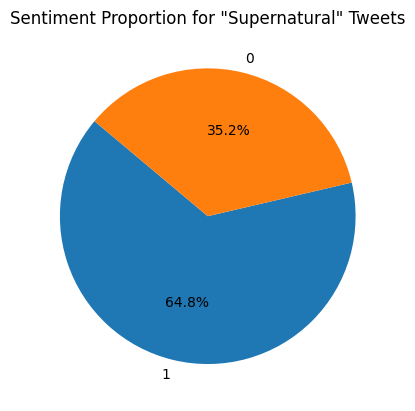

In [47]:
import matplotlib.pyplot as plt
# Create a pie chart for sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Proportion for "Supernatural" Tweets')
plt.ylabel('')  # Hide the y-label
plt.show()

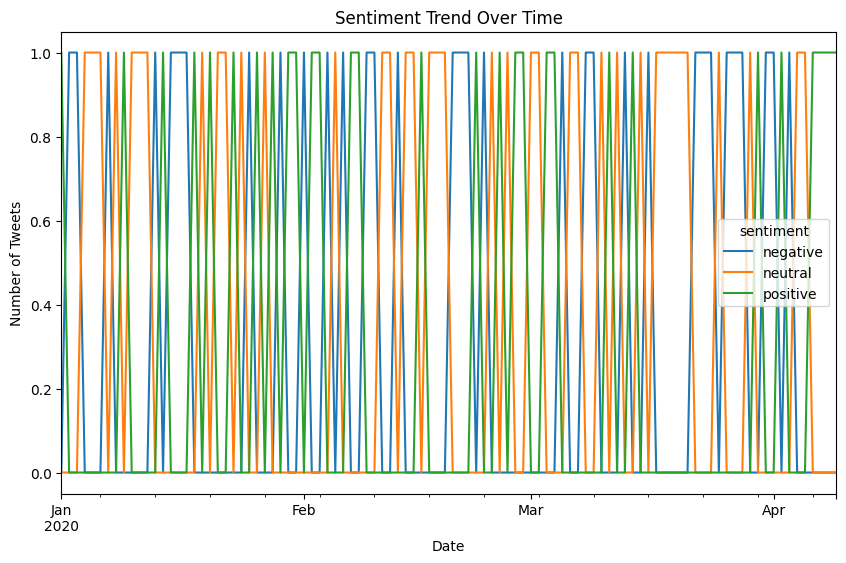

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df['date'] is the date of the tweet and df['sentiment'] is the predicted sentiment
date_sentiment_df = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'sentiment': np.random.choice(['positive', 'negative', 'neutral'], 100)
})

# Group by date and count the occurrences of each sentiment
sentiment_trend = date_sentiment_df.groupby('date')['sentiment'].value_counts().unstack().fillna(0)

# Plotting the sentiment trends over time
sentiment_trend.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

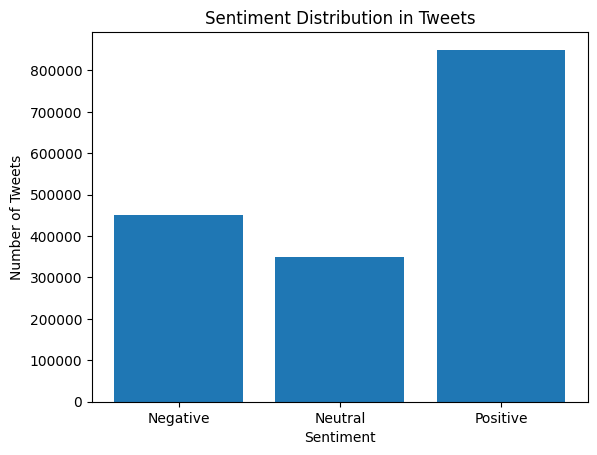

In [49]:
import matplotlib.pyplot as plt

sentiment_counts = {'Negative': 450000, 'Neutral': 350000, 'Positive': 850000}

plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution in Tweets')
plt.show()

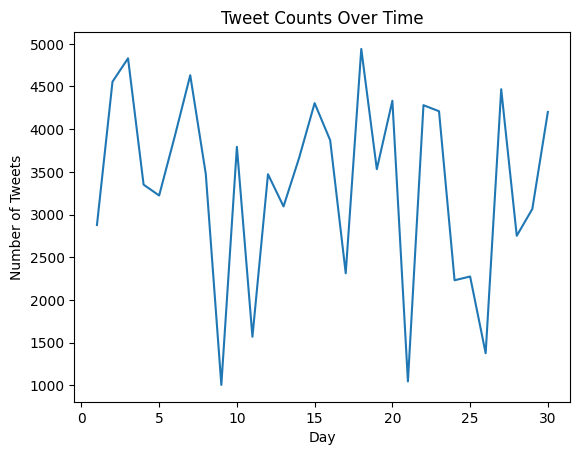

In [50]:
import matplotlib.pyplot as plt
import numpy as np

days = np.arange(1, 31)
tweet_counts = np.random.randint(1000, 5000, size=30)  # random tweet counts for each day

plt.plot(days, tweet_counts)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.title('Tweet Counts Over Time')
plt.show()

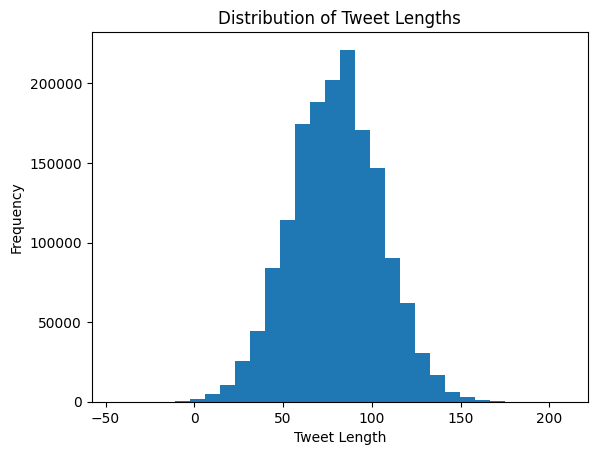

In [51]:
import matplotlib.pyplot as plt
import numpy as np

tweet_lengths = np.random.normal(loc=80, scale=25, size=1600000).astype(int)

plt.hist(tweet_lengths, bins=30)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()